In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
#from sklearn import cross_validation, ensemble, preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier   ##分類
from sklearn.tree import DecisionTreeClassifier   ##分類
#from sklearn.ensemble import RandomForestRegressor    ##回歸
#from sklearn.metrics import roc_auc_score
import random
from sklearn.ensemble import AdaBoostClassifier   ##分類
#還是要固定訓練資料和測試資料筆數

from sklearn.model_selection import cross_val_score

In [3]:
dataset_num = 1

In [4]:
#all_no_miss
train_ori = pd.read_csv('0410RF_train_data_'+str(dataset_num)+'.csv')
test = pd.read_csv('0410RF_test_data_'+str(dataset_num)+'.csv')
combine = pd.concat([train_ori, test] , ignore_index=True)

In [5]:
combine = pd.get_dummies(data = combine , columns=["occupation","WHERE","PRE_DIAG"])

In [6]:
train_ori = combine[0:len(train_ori)]
test_ori = combine[len(train_ori):]

In [7]:
train_feature_ori = train_ori.columns[1:]
train_target_ori = train_ori.columns[0]
train_feature_ori = train_ori[train_feature_ori]
train_y_ori = train_ori[train_target_ori]

In [8]:
test_feature_ori = test_ori.columns[1:]
test_target_ori = test_ori.columns[0]
test_feature_ori = test_ori[test_feature_ori]
test_y_ori = test_ori[test_target_ori]

In [9]:
column = pd.read_csv('0410train_data_column.csv')

第1次
None option
C-stat: 0.5714285714285714

auto option
C-stat: 0.6428571428571429

log2 option
C-stat: 0.5

0.8 option
C-stat: 0.5

0.5 option
C-stat: 0.5

---------------------------
第2次
None option
C-stat: 0.5714285714285714

auto option
C-stat: 0.5

log2 option
C-stat: 0.6428571428571429

0.8 option
C-stat: 0.5

0.5 option
C-stat: 0.5

---------------------------
第3次
None option
C-stat: 0.5714285714285714

auto option
C-stat: 0.5

log2 option
C-stat: 0.6428571428571429

0.8 option
C-stat: 0.5714285714285714

0.5 option
C-stat: 0.6428571428571429

---------------------------
第4次
None option
C-stat: 0.42857142857142855

auto option
C-stat: 0.5714285714285714

log2 option
C-stat: 0.5

0.8 option
C-stat: 0.5

0.5 option
C-stat: 0.5

---------------------------
第5次
None option
C-stat: 0.5714285714285714

auto option
C-stat: 0.6428571428571429

log2 option
C-stat: 0.5

0.8 option
C-stat: 0.5

0.5 option
C-stat: 0.5

---------------------------
第6次
None option
C-stat: 0.5714285714285714



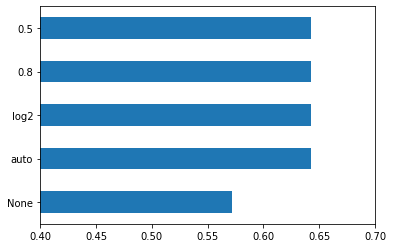

In [10]:
for i in range(10):
    result_feature = []
    max_features_options = [None, "auto", "log2", 0.8, 0.5 ]
    print("第"+str(i+1)+"次")
    for max_features in max_features_options:
        model = RandomForestClassifier(25, oob_score = True, n_jobs = -1, max_features = max_features)
        model.fit( train_feature_ori , train_y_ori )
        print( max_features, "option" )
        acc = model.score(test_feature_ori, test_y_ori)
        print( "C-stat:", acc )
        result_feature.append(acc)
        print("")
    pd.Series(result_feature, max_features_options).plot(kind="barh",xlim=(.4,.7))
    print("---------------------------")